In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# LiH = pd.read_csv('LiH.csv')
# NaH = pd.read_csv('NaH.csv')
# KH  = pd.read_csv('KH.csv')
# RbH = pd.read_csv('RbH.csv')
# CsH = pd.read_csv('CsH.csv')

Li = pd.read_csv('../d3_mbd_features_data/D3/LiH.csv')
Li_mbd = pd.read_csv('../d3_mbd_features_data/MBD/LiH.csv') - 0.36
# Li = pd.read_csv('d3/Li.csv')

# LiH['without_dis'] = LiH['energy']-LiH['E-dispersion']
# NaH['without_dis'] = NaH['energy']-NaH['E-dispersion']
# KH['without_dis'] = KH['energy']-KH['E-dispersion']
# RbH['without_dis'] = RbH['energy']-RbH['E-dispersion']
# CsH['without_dis'] = CsH['energy']-CsH['E-dispersion']
Li['without_dis'] = Li['energy']-Li['E-dispersion']

Li.head()
Li_mbd.head()

,cell_length,energy,E-dispersion
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,3.557239,-24.529072,-0.64782


In [95]:
def plotG(df,df2):
    plt.figure(figsize=(16, 11))
    plt.plot(df['cell_length']/2, df['E-dispersion'], linewidth=4, color='black')
    plt.scatter(df['cell_length']/2, df['E-dispersion'], marker='*', s=800, color='black')
    plt.plot(df2['cell_length']/2, df2['E-dispersion'], linewidth=4, color='darkgreen')
    plt.scatter(df2['cell_length']/2, df2['E-dispersion'], marker='o', s=200, color='darkgreen')
    plt.rcParams['font.family'] = 'Arial'
    plt.xlabel('Bond Length', fontsize=42)
    # plt.ylabel('Energy', fontsize=42)
    plt.legend()
    plt.xticks(fontsize=42)
    plt.yticks(fontsize=42)
    # add space at the bottom
    # plt.grid(True)
    for spine in plt.gca().spines.values():
        spine.set_linewidth(1)
    plt.show()

/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_22385/3609095895.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


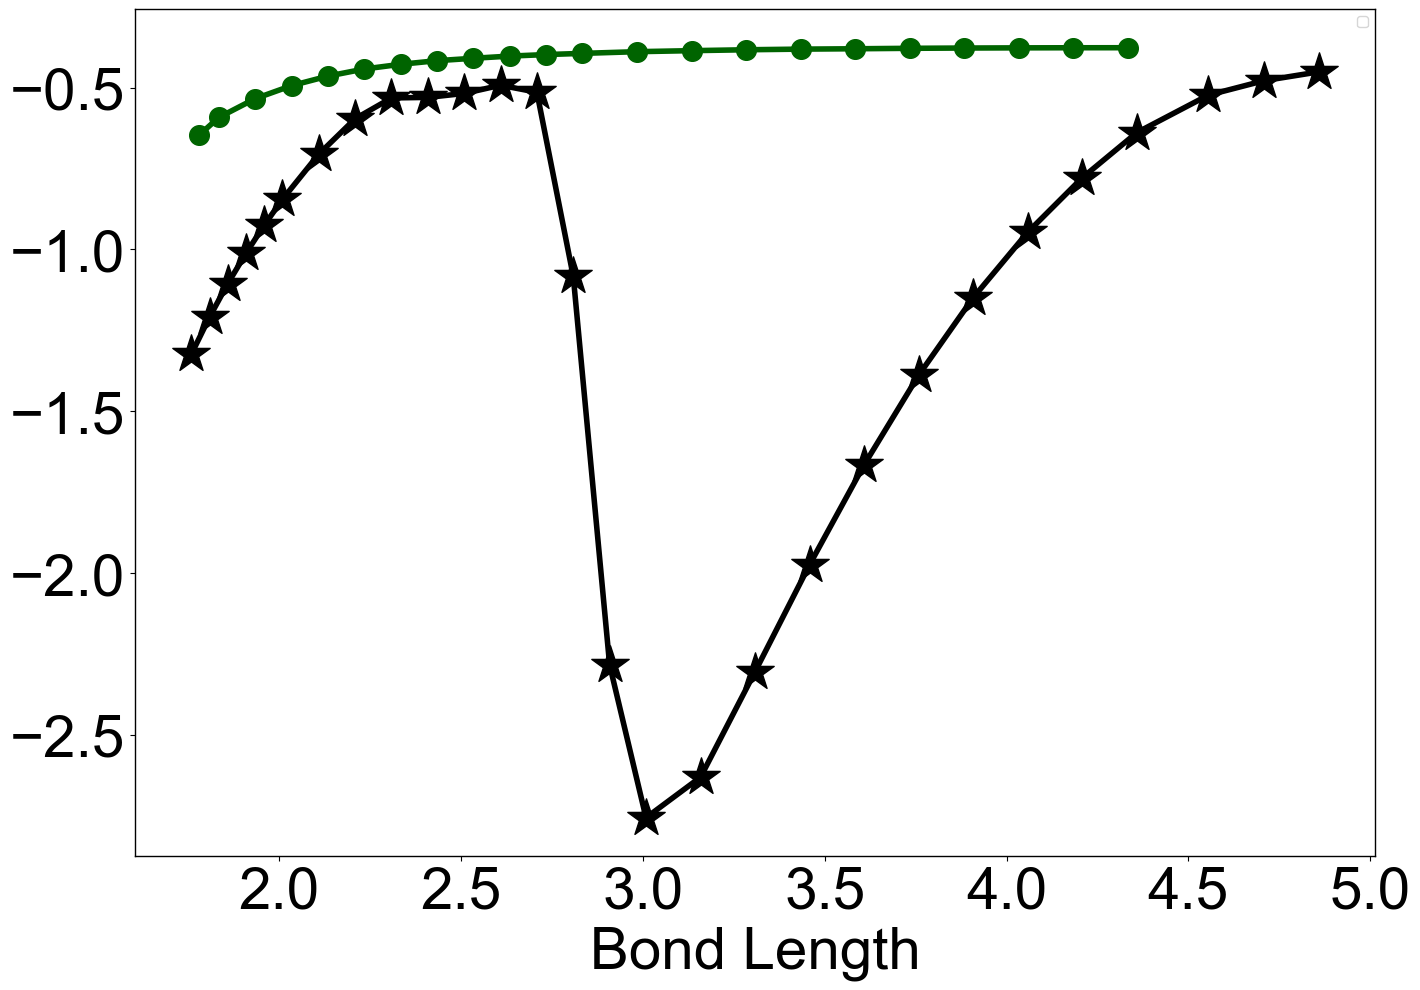

In [96]:
plotG(Li,Li_mbd)
# plotG(NaH)

# plotG(KH)

In [59]:
# plt.plot(LiH['cell_length'],LiH['without_dis'])
# plt.plot(LiH['cell_length'],LiH['energy'])
plt.plot(LiH['cell_length'],LiH['energy'])
plt.plot(NaH['cell_length'],NaH['energy'])
plt.plot(KH['cell_length'],KH['energy'])
plt.plot(RbH['cell_length'],RbH['energy'])
plt.plot(CsH['cell_length'],CsH['energy'])
plt.show()
# plt.plot(CsH['cell_length'],CsH['E-dispersion'])

NameError: name 'LiH' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.optimize import minimize_scalar

filtered_data = RbH[RbH['cell_length'] > 8.5]
filtered_data = filtered_data.groupby('cell_length', as_index=False).mean()
filtered_data = filtered_data.dropna()
filtered_data = filtered_data[np.isfinite(filtered_data['E-dispersion'])]
filtered_data = filtered_data.sort_values(by='cell_length')

print(filtered_data)
x = filtered_data['cell_length']
y = filtered_data['E-dispersion']

degree = 6
coefficients = np.polyfit(x, y, degree) 
polynomial = np.poly1d(coefficients)


x_smooth = np.linspace(min(x), max(x), 500)
y_smooth = polynomial(x_smooth)

result = minimize_scalar(polynomial, bounds=(min(x), max(x)))
min_x = result.x
min_y = polynomial(min_x)

   cell_length     energy  E-dispersion  without_dis
0     8.508162 -14.534580      -0.48698   -14.047600
1     8.858162 -14.352741      -1.06685   -13.285891
2     9.208162 -14.403303      -1.84927   -12.554033
3     9.558162 -13.741158      -1.88518   -11.855978
4     9.908162 -12.843549      -1.65040   -11.193149
5    10.258162 -11.948312      -1.38128   -10.567032
6    10.608162 -11.113994      -1.13748    -9.976514


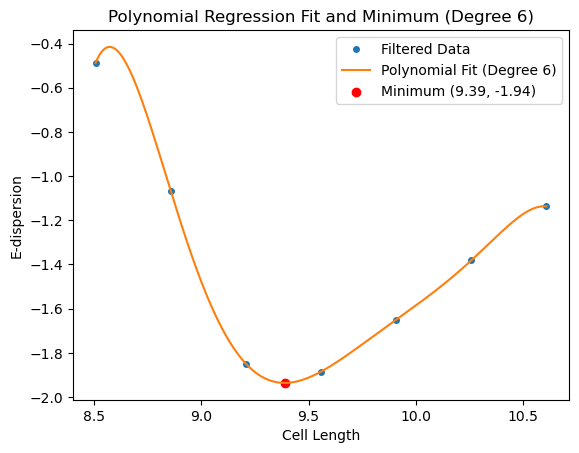

Minimum point is at x = 9.3884, y = -1.9363


In [ ]:
plt.plot(x, y, 'o', label='Filtered Data', markersize=4)  # Scatter points
plt.plot(x_smooth, y_smooth, label=f'Polynomial Fit (Degree {degree})')
plt.scatter([min_x], [min_y], color='red', label=f'Minimum ({min_x:.2f}, {min_y:.2f})')
plt.legend()
plt.xlabel('Cell Length')
plt.ylabel('E-dispersion')
plt.title(f'Polynomial Regression Fit and Minimum (Degree {degree})')
plt.show()

print(f"Minimum point is at x = {min_x:.4f}, y = {min_y:.4f}")

In [ ]:
def findMinX(df):
    min_y_index = df["energy"].idxmin()
    min_x_value = df.loc[min_y_index, "cell_length"]
    
    print(min_y_index)
    return abs(df['E-dispersion'][min_y_index])

In [ ]:
val_LiH = abs(min(LiH['E-dispersion']))
val_NaH = abs(min(NaH['E-dispersion']))
val_KH = abs(min(KH['E-dispersion']))
val_RbH = abs(min(RbH['E-dispersion']))
val_CsH = abs(min(CsH['E-dispersion']))

base_LiH = abs(findMinX(LiH))
base_NaH = abs(findMinX(NaH))
base_KH = abs(findMinX(KH))
base_RbH = abs(findMinX(RbH))
base_CsH = abs(findMinX(CsH))

total_LiH = abs(min(LiH['energy']))
total_NaH = abs(min(NaH['energy']))
total_KH = abs(min(KH['energy']))
total_RbH = abs(min(RbH['energy']))
total_CsH = abs(min(CsH['energy']))


print(val_LiH/base_LiH ,val_NaH/base_NaH,val_KH/base_KH,val_RbH/base_RbH)
print(total_LiH, total_NaH, total_KH, total_RbH)

5
5
5
5
5
3.2590139112330845 2.7208251105255616 3.1638754406236744 2.7396093704586413
24.829256 21.204923 19.946678 19.132743


[2.75504, 2.46787, 2.16311, 1.88518, 1.70797]


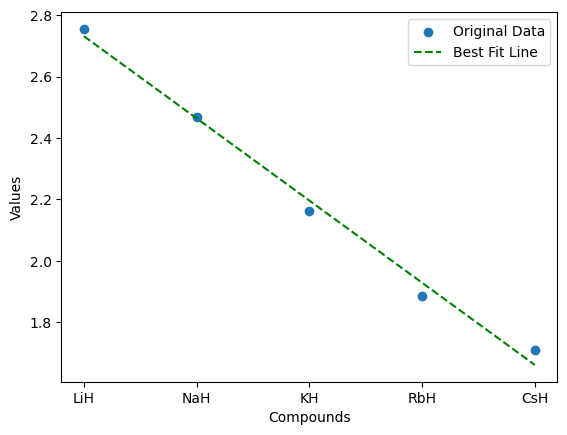

In [ ]:
x = ['LiH', 'NaH', 'KH', 'RbH', 'CsH']
y = [val_LiH, val_NaH, val_KH, val_RbH, val_CsH]
print(y)

x_indices = np.arange(len(x))

coefficients = np.polyfit(x_indices, y, 1)  
best_fit_line = np.polyval(coefficients, x_indices)

plt.scatter(x_indices, y, label='Original Data', marker='o')

plt.plot(x_indices, best_fit_line, label='Best Fit Line', linestyle='--', color='green')

plt.xticks(ticks=x_indices, labels=x)



plt.xlabel('Compounds')
plt.ylabel('Values')
plt.legend()
plt.show()


In [ ]:
coefficients = np.polyfit(x_indices, y, 1)
y_pred = np.polyval(coefficients, x_indices)

y_mean = np.mean(y)

ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)

r2 = 1 - (ss_residual / ss_total)
print(f"R^2 value: {r2}")


R^2 value: 0.9920239825382047


Total Energy have the same trend

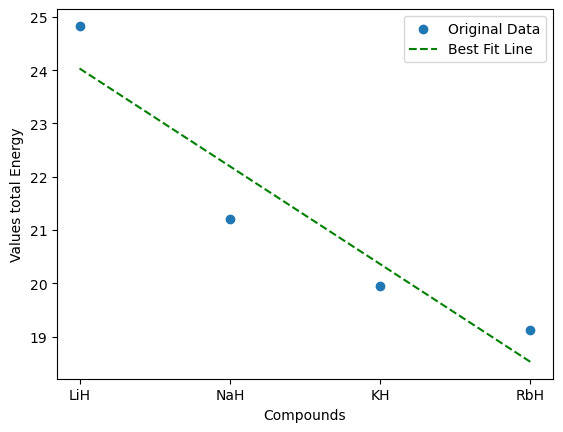

In [ ]:
x = ['LiH', 'NaH', 'KH', 'RbH']
y = [total_LiH, total_NaH, total_KH, total_RbH]


x_indices = np.arange(len(x))

coefficients = np.polyfit(x_indices, y, 1)  
best_fit_line = np.polyval(coefficients, x_indices)

plt.scatter(x_indices, y, label='Original Data', marker='o')

plt.plot(x_indices, best_fit_line, label='Best Fit Line', linestyle='--', color='green')

plt.xticks(ticks=x_indices, labels=x)



plt.xlabel('Compounds')
plt.ylabel('Values total Energy')
plt.legend()
plt.show()


In [ ]:
redox_potentials = np.array([-3.05,-2.71,-2.94,-2.94,-3.02])
ENs = 2.2 - np.array([0.98,0.93,0.82,0.82,0.79])
atomic_radius = np.array([152,186,227,248,265])

[2755.04 2467.87 2163.11 1950.   1710.3 ]


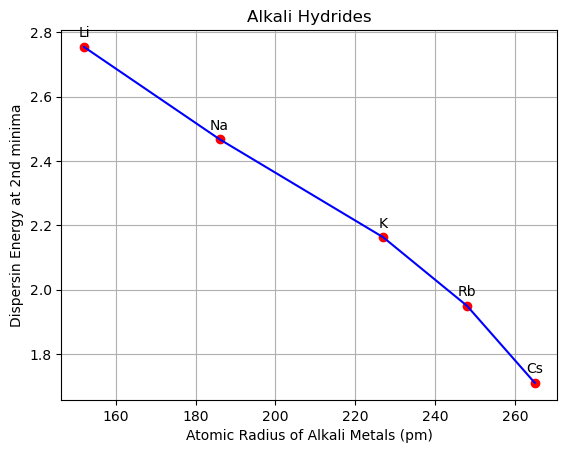

In [ ]:
# dividing by base values 
labels = ['Li', 'Na', 'K', 'Rb', 'Cs']
x = atomic_radius
# temp = np.array([val_LiH, val_NaH, val_KH, val_RbH,val_CsH])
# print(temp)
# y = np.array([2.79/base_LiH ,2.48/base_NaH, 2.16/base_KH, 1.95/base_CsH,1.7103/base_CsH,])
# bases = np.array([base_LiH, base_NaH, base_KH, base_RbH])
# print(bases)
y = np.array([val_LiH ,val_NaH,val_KH, 1.95,1.7103])*1000
print(y)
y = y/1000
fac = 0.03

# Create the plot
plt.plot(x, y, linestyle='-', color='blue' )  # Line plot
plt.scatter(x, y, color='red')          # Scatter points

# Annotate each point with its respective label
for i, label in enumerate(labels):
    plt.text(x[i], y[i]+0.03 , label, fontsize=10, ha='center')  # Offset for clarity

# Add labels, title, and legend
plt.ylabel("Dispersin Energy at 2nd minima")
plt.xlabel("Atomic Radius of Alkali Metals (pm)")
plt.title("Alkali Hydrides")
plt.grid(True)
plt.show()

#### Significance of Standard Reduction Potential
Higher Magnitude means its more likely to release an electron so the Hydrogen willl have a higher negetive charge. This is not refected in the electronegetivity difference. 


E = k * ENs
1. redox potential
2. delta EN
3. radius ratio
4. Extent of covalancy
5. Sigma and pi delocalisation 
6. Effective nuclear charge

[ 1.288  1.331  1.466  1.494 -0.82 ]


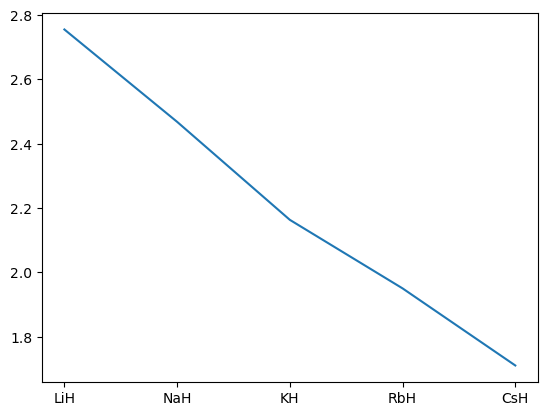

In [ ]:
ENs = 2.2 - np.array([0.912,0.869,0.734,0.706,3.02])
zeff = np.array([1.3,2.2,3.7,4.7])
print(ENs)
ENs **= 1
# y = y/ENs

x = ['LiH', 'NaH', 'KH', 'RbH','CsH']
# y = [total_LiH, total_NaH, total_KH, total_RbH]


plt.plot(x,y)
plt.show()


[Electro negetivity](https://www.britannica.com/science/alkali-metal/General-properties-of-the-group)

[Redox potential](https://barron.rice.edu/Courses/360/360_04_redox.pdf)

[Zeff values](https://en.wikipedia.org/wiki/Effective_nuclear_charge)

[atomic_raius](https://en.wikipedia.org/wiki/Alkali_metal)

In [ ]:
redox_potentials = np.array([-3.05,-2.71,-2.94,-2.94,-3.02])
ENs = 2.2 - np.array([0.98,0.93,0.82,0.82,0.79])
atomic_radius = np.array([152,186,227,248,265])

ENs
IE=[520, 496, 419, 408, 376];
IE2 = [7298, 4560, 3050, 2630, 2420];


In [ ]:
df = pd.DataFrame({'redox_potentials':redox_potentials,
                    'atomic_radius':atomic_radius,
                    'IE':IE,
                    'IE2':IE2,
                    'EN diff':ENs,
                    'Vals':y,
                     })
df.head()

,redox_potentials,atomic_radius,IE,IE2,EN diff,Vals
0,-3.05,152,520,7298,1.22,2.75504
1,-2.71,186,496,4560,1.27,2.46787
2,-2.94,227,419,3050,1.38,2.16311
3,-2.94,248,408,2630,1.38,1.95000
4,-3.02,265,376,2420,1.41,1.71030


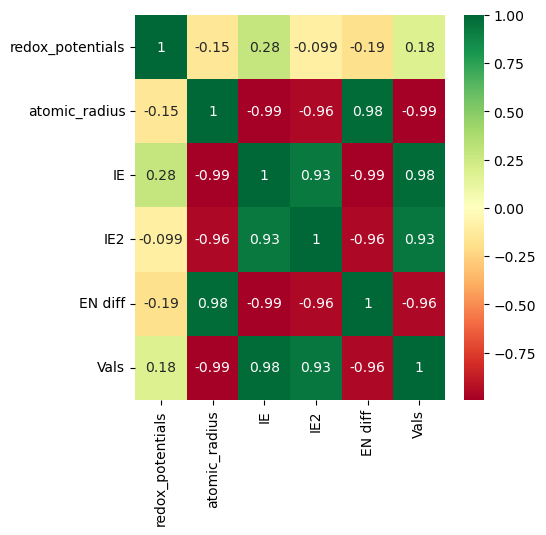

In [ ]:
df.head()
corrmat =df.corr()

# corelations = corr['y'].sort_values(ascending=True)
# corelations
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

E-5

E-2

1.Check for graphene double layer

2.Back phosphorus bulk and monolayer

3.Ferrocene for cation pi interaction

4.Nano 281 by shyue ping  ong from ucsd

In [ ]:
corrmat.index
corrmat['Vals']

redox_potentials    0.178634
atomic_radius      -0.994233
IE                  0.980629
IE2                 0.933955
EN diff            -0.961288
Vals                1.000000
Name: Vals, dtype: float64

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model = ExtraTreesRegressor()
model.fit(df[['redox_potentials','atomic_radius','EN diff','IE','IE2']],df['Vals'])

ExtraTreesRegressor()

In [ ]:
model.feature_importances_

array([0.01896893, 0.20741143, 0.48229121, 0.14605492, 0.1452735 ])

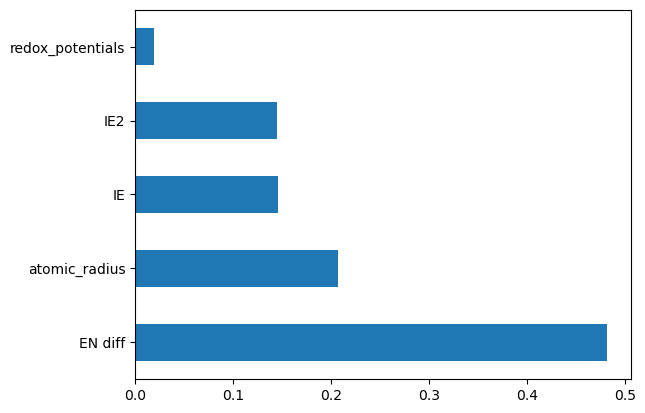

In [ ]:
# plot the feature importances
feat_importances = pd.Series(model.feature_importances_, index=df[['redox_potentials','atomic_radius','EN diff','IE','IE2']].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

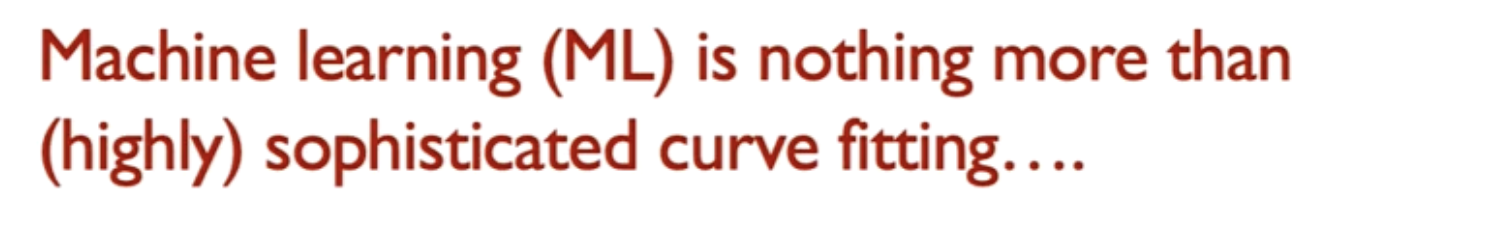

In [ ]:
graphen_double = pd.read_csv('graphen_double.csv')

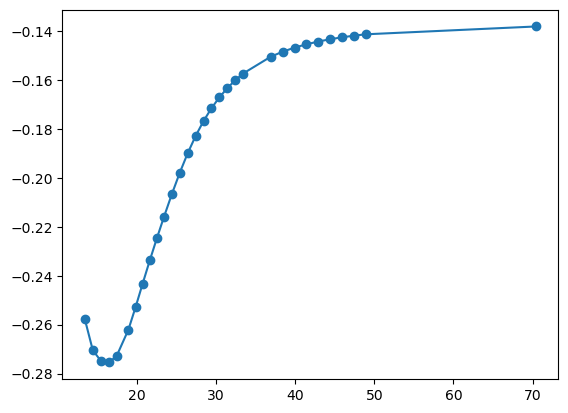

In [ ]:
# plt.plot(graphen['cell_length'], graphen['energy'])
# plt.scatter(graphen['cell_length'], graphen['energy'])
graphen= graphen_double[graphen_double['cell_length']>0]
plt.scatter(graphen['cell_length'], graphen['E-dispersion'])
plt.plot(graphen['cell_length'], graphen['E-dispersion'])
plt.show()

In [ ]:
graphne_single = pd.read_excel('pbe_d3_2.1_graphene.xlsx')

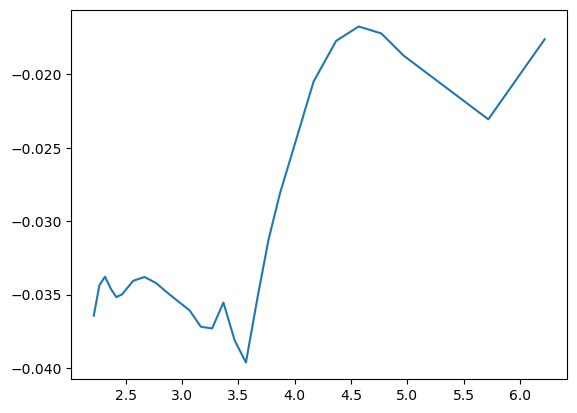

In [ ]:
plt.plot(graphne_single['cell_length'], graphne_single['E-dispersion'])

double layre E - 7,8 ,9, 10 ,11,12 , 13 ,14, 15  ,16 ,17 , 18 ,19